In [1]:
import os, mne, socket
from mne_bids import BIDSPath, read_raw_bids
import pandas as pd
import nibabel as nib
import numpy as np

%matplotlib qt

# Get the hostname
hostname = socket.gethostname()

if 'hpc' in hostname:
    # You are running your code on HPC
    curr_dir = os.getcwd()
    path_parts = curr_dir.split(os.sep)
    dataPath = os.path.join(os.sep, 'scratch', 'work', 'courses', 'PSYCH-GA-3405-2024fa')
elif hostname == 'sebastian_mac':
    # You are Sebastian
    # Setting up paths for data
    mydir = os.getcwd()
    path_parts = mydir.split(os.sep)
    idcs = [i for i, c in enumerate(mydir) if c == os.sep]
    dataPath = mydir[:idcs[-2]]
else:
    # You are running on your device with Google drive path
    # Define the paths and initialize Fieldtrip
    my_user_id = 'mdd9787'  # change this to your netID
    curr_dir = os.getcwd()
    path_parts = curr_dir.split(os.sep)
    base_dir = os.path.join(os.sep, *path_parts[:3])
    dataPath = os.path.join(base_dir, 'Library', 'CloudStorage', f'GoogleDrive-{my_user_id}@nyu.edu', 'My Drive', 'Coursework', 'EEG MEG methods', 'ClassData')

eegRoot = os.path.join(dataPath, 'EEGBids')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Installing Freesurfer
##### In order to perform anatomical processing for headmodeling and source reconstruction, we will be using Freesurfer run_recon_all.
##### First step is to install freesurfer on your devies. You can find the installation best suited for your device:
##### https://surfer.nmr.mgh.harvard.edu/fswiki/rel7downloads
##### And follow the instructions to set freesurfer: https://surfer.nmr.mgh.harvard.edu/fswiki/DownloadAndInstall?action=AttachFile&do=get&target=installFS_demo.mp4

##### Run freesurfer run-recon-all:
##### On HPC first set up paths that are relevant:
##### export FREESURFER_HOME=/share/apps/freesurfer/7.4.1
##### source $FREESURFER_HOME/SetUpFreeSurfer.sh
##### export SUBJECTS_DIR=/scratch/work/courses/PSYCH-GA-3405-2024fa/EEGBids/sub-004/anat
##### my_subject=sub-004
##### my_NifTI=/scratch/work/courses/PSYCH-GA-3405-2024fa/EEGBids/sub-004/anat/sub-004_T1w.nii.gz
##### recon-all -i $my_NifTI -s $my_subject -all
##### mne watershed_bem -s sub-004

In [ ]:
## Load data
groupName = 'GroupD'  # Change group name to analyze different dataset (valid IDs: GroupA, GroupC, GroupD)
userName = 'mrugank'  # Make sure to ensure that you are writing to your derivatives 
taskName = 'oddball'

# Get subject code for your group
groupMap = {'GroupA': '001', 'GroupC': '003', 'GroupD': '004'}
subjCode = groupMap[groupName]
subject = f'sub-{subjCode}'

dataPath = os.path.join(eegRoot, f'sub-{subjCode}', 'eeg')
derivPath = os.path.join(eegRoot, 'derivatives', userName, 'preprocessing', f'sub-{subjCode}')

freesurferSubDir = os.path.join(eegRoot, f'sub-{subjCode}', 'anat')
if not os.path.exists(derivPath):
    os.makedirs(derivPath)

saveRoot = f'sub-{subjCode}_task-{taskName}_'

# bdfPath = os.path.join(dataPath, f'{saveRoot}eeg.bdf')

# Load the data
# raw = mne.io.read_raw_bdf(bdfPath, preload=False)
raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot))
# Set channel types for EOG
raw.set_channel_types({'EXG1': 'eog', 'EXG2': 'eog', 'EXG3': 'eog', 'EXG4': 'eog'})
# Remove unwanted channels
unwanted_channels = ['EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
raw.drop_channels(unwanted_channels)


Extracting EDF parameters from /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/eeg/sub-004_task-oddball_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/eeg/sub-004_task-oddball_events.tsv.
The event "" refers to multiple event values. Creating hierarchical event names.
    Renaming event:  -> /4
    Renaming event:  -> /2
    Renaming event:  -> /4
    Renaming event:  -> /1
    Renaming event:  -> /4
    Renaming event:  -> /2
    Renaming event:  -> /1
    Renaming event:  -> /1
    Renaming event:  -> /1
    Renaming event:  -> /4
    Renaming event:  -> /2
    Renaming event:  -> /2
    Renaming event:  -> /8
    Renaming event:  -> /1
    Renaming event:  -> /4
    Renaming event:  -> /2
    Renaming event: 

/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_53870/4062655025.py:24: RuntimeWarning: The number of channels in the channels.tsv sidecar file (261) does not match the number of channels in the raw data file (272). Will not try to set channel names.
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot))
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_53870/4062655025.py:24: RuntimeWarning: The unit for channel(s) Status has changed from NA to V.
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot))
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_53870/4062655025.py:24: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EXG1', 'EXG2', 'EXG3', 'EXG4']
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot))
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_53870/4062655025.py:24: RuntimeWarning: DigMontage is only a subset of info. There 

<RawEDF | sub-004_task-oddball_eeg.bdf, 261 x 2347008 (4584.0 s), ~347 kB, data not loaded>

# Align electrodes and headshape

In [3]:
anatPath = os.path.join(eegRoot, f'sub-{subjCode}', 'anat')
# Read headshape file
tbl = pd.read_table(os.path.join(anatPath, f'sub-{subjCode}_headshape.tsv'), keep_default_na=False, names=['Label', 'X', 'Y', 'Z'], skiprows=1)

extra_points = tbl[tbl['Label'] == 'EXTRA'][['X', 'Y', 'Z']].values / 100

# Access the current montage in raw
montage = raw.get_montage()

# Create new entries for the headshape points
# The headshape points will be stored as extras in the montage's 'dig' field
new_dig = [
    dict(
        kind=mne.io.constants.FIFF.FIFFV_POINT_EXTRA,  # Headshape point kind
        ident=i + len(montage.dig),                 # Unique identifier
        r=pos,                                      # (x, y, z) coordinates
        coord_frame=mne.io.constants.FIFF.FIFFV_COORD_HEAD
    )
    for i, pos in enumerate(extra_points)
]

# Add the new headshape points to the existing montage
montage.dig.extend(new_dig)

# Set the updated montage back to the raw object
raw.set_montage(montage)

# Update fiducials
montage.dig[0]['r'] = np.array([-0.2424, 8.0067, -0.0293]) / 100 # LPA
montage.dig[1]['r'] = np.array([10.1326, 0.0381, 0.0892]) / 100 # NAS
montage.dig[2]['r'] = np.array([0.2545, -8.0017, -0.0248]) / 100 # RPA

raw.set_montage(montage)

# Save the raw data
# raw.save(os.path.join(derivPath, saveRoot + 'raw.fif'), overwrite=True)

<RawEDF | sub-004_task-oddball_eeg.bdf, 261 x 2347008 (4584.0 s), ~451 kB, data not loaded>

In [4]:
montage.dig

[<DigPoint |        LPA : (-2.4, 80.1, -0.3) mm     : head frame>,
 <DigPoint |     Nasion : (101.3, 0.4, 0.9) mm      : head frame>,
 <DigPoint |        RPA : (2.5, -80.0, -0.2) mm     : head frame>,
 <DigPoint |     EEG #1 : (-2.9, -1.6, 136.9) mm    : head frame>,
 <DigPoint |     EEG #2 : (-20.3, -2.6, 132.5) mm   : head frame>,
 <DigPoint |     EEG #3 : (-31.3, -1.7, 128.3) mm   : head frame>,
 <DigPoint |     EEG #4 : (-41.5, -0.5, 120.6) mm   : head frame>,
 <DigPoint |     EEG #5 : (-49.8, 1.5, 112.3) mm    : head frame>,
 <DigPoint |     EEG #6 : (-56.8, 3.2, 102.2) mm    : head frame>,
 <DigPoint |     EEG #7 : (-54.9, 22.3, 103.1) mm   : head frame>,
 <DigPoint |     EEG #8 : (-61.4, 23.4, 91.2) mm    : head frame>,
 <DigPoint |     EEG #9 : (-68.9, 20.4, 79.0) mm    : head frame>,
 <DigPoint |    EEG #10 : (-72.1, 23.3, 66.1) mm    : head frame>,
 <DigPoint |    EEG #11 : (-76.3, 21.9, 50.7) mm    : head frame>,
 <DigPoint |    EEG #12 : (-79.0, 20.9, 37.0) mm    : head fra

In [5]:
# Visualize electrodes, fiducials and headshape
fig = mne.viz.plot_alignment(raw.info, dig=True, show_axes=True)

Using pyvistaqt 3d backend.
Channel types::	eeg: 256


In [ ]:
# Coregister the data to the head model
coreg = mne.gui.coregistration(subject=subject, subjects_dir=freesurferSubDir)

    Triangle neighbors and vertex normals...
Using low resolution head model in /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Using fiducials from: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/sub-004-fiducials.fif.
    Triangle neighbors and vertex normals...
Using low resolution head model in /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Using fiducials from: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/sub-004-fiducials.fif.
Loading MRI fiducials from /Users/mrugan

Placing MRI fiducials - LPA
Placing MRI fiducials - NASION
Placing MRI fiducials - LPA
Placing MRI fiducials - RPA
Placing MRI fiducials - NASION
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Loading MRI fiducials from /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/sub-004-fiducials.fif... Done!
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Channel types::	eeg: 256
Aligning using fiducials

In [7]:
trans = coreg.coreg.trans # Get the transformation matrix (Head to MRI)
print(trans)

<Transform | head->MRI (surface RAS)>
[[ 0.0668607  -0.99774361  0.00611077 -0.00082494]
 [ 0.96162531  0.06280458 -0.26708115 -0.01645106]
 [ 0.26609473  0.02373351  0.96365467 -0.02525022]
 [ 0.          0.          0.          1.        ]]


In [8]:
plot_kwargs = dict(
    subject=subject,
    subjects_dir=freesurferSubDir,
    surfaces=['head'],
    dig=True,
    eeg="original",
    meg=[],
    coord_frame='mri',
    show_axes=True,
)
view_kwargs = dict(azimuth=45, elevation=90, distance=0.6, focalpoint=(0.0, 0.0, 0.0))

fig=mne.viz.plot_alignment(raw.info, trans=trans, **plot_kwargs)

Using outer_skin.surf for head surface.
Channel types::	eeg: 256


Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/inner_skull.surf
Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skull.surf
Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skin.surf


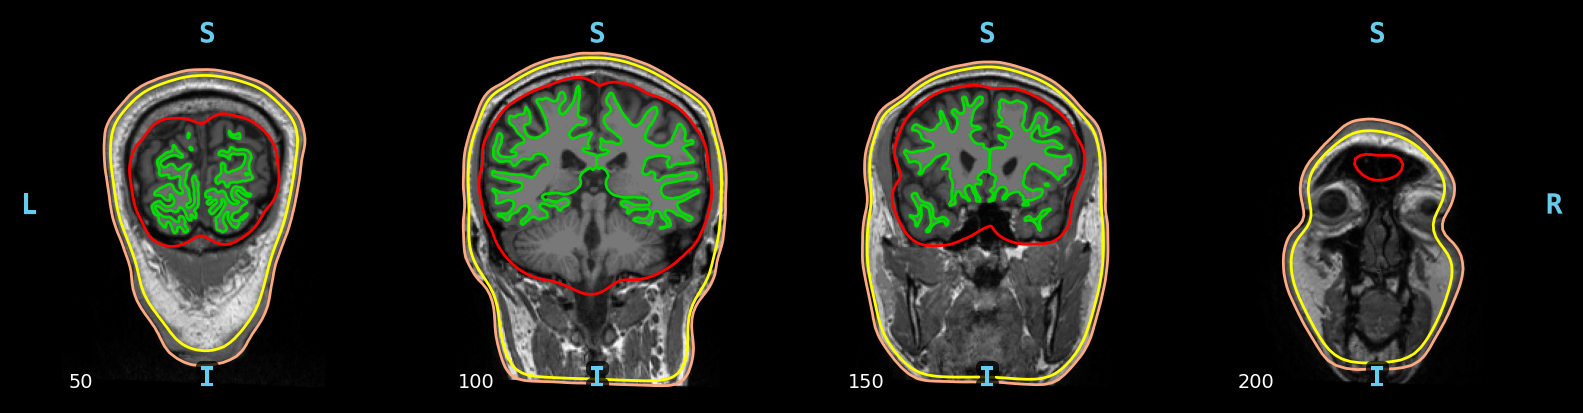

In [9]:
# Visualize BEM surfaces
plot_bem_kwargs = dict(
    subject=subject,
    subjects_dir=freesurferSubDir,
    brain_surfaces='white',
    orientation='coronal',
    slices=[50, 100, 150, 200],
    show=True
)

mne.viz.plot_bem(**plot_bem_kwargs)

In [16]:
# Set up the source space
src = mne.setup_source_space(
    subject=subject,
    subjects_dir=freesurferSubDir,
    spacing='oct4',
    add_dist='patch',
)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat
Subject      = sub-004
Surface      = white
Octahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/surf/lh.white...
Mapping lh sub-004 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 258/143268 selected to source space (oct = 4)

Loading /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Co

Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/inner_skull.surf
Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skull.surf
Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skin.surf


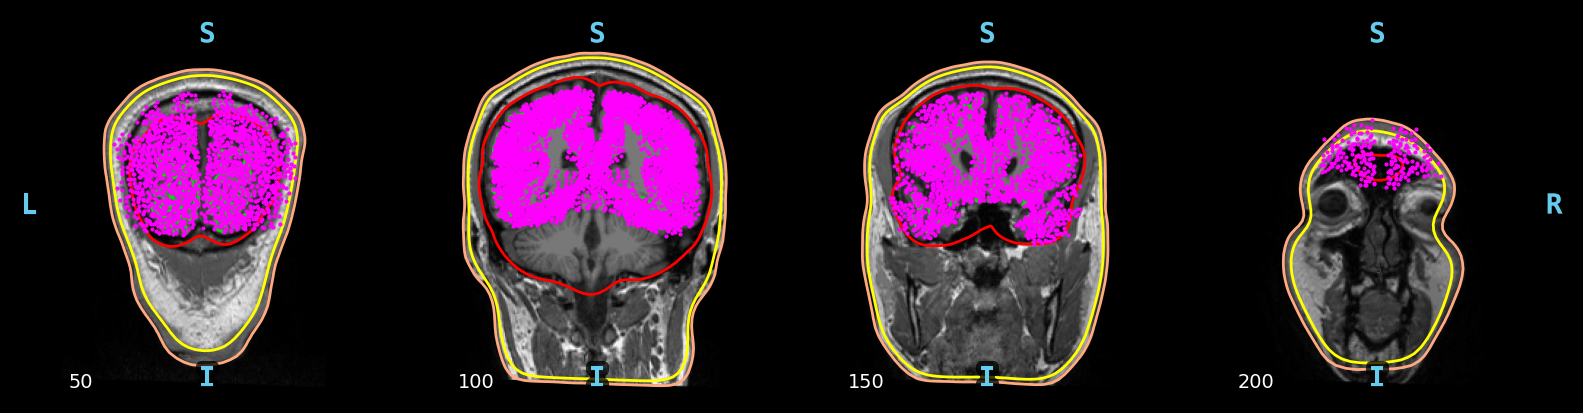

In [14]:
# Visualize the source space
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

In [15]:
# Visualize all sources in 3D
fig = mne.viz.plot_alignment(
    subject=subject,
    subjects_dir=freesurferSubDir,
    surfaces=dict(inflated=0.01, outer_skull=0., head=0),
    coord_frame='mri',
    src=src,
)
mne.viz.set_3d_view(
    fig,
    azimuth=173.78,
    elevation=101.75,
    distance=0.30,
    focalpoint=(-0.03, -0.01, 0.03),
)

Using outer_skin.surf for head surface.


In [17]:
# Compute forward solution
conductivity = (0.3, 0.006, 0.3) # for three layers
model = mne.make_bem_model(
    subject=subject,
    ico=4,
    conductivity=conductivity,
    subjects_dir=freesurferSubDir,
)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.77 -15.56  12.92 mm
outer skull CM is  -0.77 -15.39  12.46 mm
inner skull CM is  -0.59 -19.28  21.98 mm
Checking that surface outer skull is inside surface outer skin  ...
Checking that surface inner skull is inside surface outer skull ...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    2.1 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    4.7 mm
Surfaces passed the basic topology checks.
Complete.

Three-layer model surfaces loaded.
Computing the linear collocation solution...
    Matrix coefficients...
     

In [18]:
fwd = mne.make_forward_solution(
    os.path.join(derivPath, saveRoot + 'raw.fif'),
    trans=trans,
    src=src,
    bem=bem,
    meg=False,
    eeg=True,
    mindist=5.0,
    n_jobs=-1,
    verbose=True,
)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=143268, n_used=258>, <surface (rh), n_vertices=143324, n_used=258>] MRI (surface RAS) coords, subject 'sub-004', ~26.3 MB>
MRI -> head transform : instance of Transform
Measurement data      : sub-004_task-oddball_raw.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 516 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    0.066861 0.961625 0.266095      22.59 mm
    -0.997744 0.062805 0.023734       0.81 mm
    0.006111 -0.267081 0.963655      19.94 mm
    0.000000 0.000000 0.000000       1.00

Read 256 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces are in head coordinates.
Checkin

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    4.4s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    4.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.6s finished


    Found   0/179 points outside using surface Qhull


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.1s


    Found   0/179 points outside using solid angles
    Total 258/258 points inside the surface
Interior check completed in 415.3 ms

Setting up for EEG...


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.4s finished


Computing EEG at 516 source locations (free orientations)...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Finished.
<Forward | MEG channels: 0 | EEG channels: 256 | Source space: Surface with 516 vertices | Source orientation: Free>


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.6s finished


In [19]:
print(f"Before: {src}")
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=143268, n_used=258>, <surface (rh), n_vertices=143324, n_used=258>] MRI (surface RAS) coords, subject 'sub-004', ~26.3 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=143268, n_used=258>, <surface (rh), n_vertices=143324, n_used=258>] head coords, subject 'sub-004', ~26.3 MB>


In [20]:
leadfield = fwd["sol"]["data"]
print(f"Leadfield size : {leadfield.shape[0]} sensors x {leadfield.shape[1]} dipoles")

Leadfield size : 256 sensors x 1548 dipoles


In [21]:
fwd_fixed = mne.convert_forward_solution(
    fwd, surf_ori=True, force_fixed=True, use_cps=True
)
leadfield = fwd_fixed["sol"]["data"]
print(f"Leadfield size : {leadfield.shape[0]} sensors x {leadfield.shape[1]} dipoles")

    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 256 sensors x 516 dipoles


In [22]:
# Compute sensitivity map
eeg_map = mne.sensitivity_map(fwd, ch_type='eeg', mode='fixed')

    256 out of 256 channels remain after picking
Adding average EEG reference projection.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [23]:
import matplotlib.pyplot as plt
picks_eeg = mne.pick_types(fwd['info'], meg=False, eeg=True)

fig = plt.figure(figsize=(8, 6))
fig.suptitle("Lead field matrix (500 dipoles only)", fontsize=14)
plt.imshow(leadfield[picks_eeg][:, :500], origin='lower', aspect='auto', cmap='RdBu_r')
plt.xlabel('sources')
plt.ylabel('EEG channels')
plt.colorbar(label='Gain')

fig2 = plt.figure(figsize=(8, 6))
plt.hist(eeg_map.data.ravel(), bins=20, color='b')
plt.title('Normal orientation sensitivity')
plt.xlabel('sensitivity')
plt.ylabel('count')

brain_sens = eeg_map.plot(
    subjects_dir=freesurferSubDir,
    clim=dict(lims=[0, 50, 100]),
    figure=1,
)
brain_sens.add_text(0.1, 0.9, 'EEG sensitivity', 'title', font_size=16)

Using control points [0.09827166 0.64178413 1.        ]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [36]:
# Load cleaned data
raw_clean = mne.io.read_raw_fif(os.path.join(derivPath, f'{saveRoot}clean-raw.fif'))

# ERP analysis
# Epoch data around the semantic visual stimulus
import numpy as np

# Apply low pass filter
raw_clean.load_data()
raw_clean.filter(l_freq=None, h_freq=15, n_jobs=-1)
# Convert annotations to events using these descriptions
events, event_dict = mne.events_from_annotations(raw_clean)

# Update duration in events
for i, evtIdx in enumerate(events):
    if evtIdx[2] not in [5, 6]:  # Skip events with code 5 or 6
        # Check if there is any event after that is not 5 or 6
        nextEvents = events[i+1:]
        # Check if there are any events after the current event that are not 5 or 6
        isNextEvent = False
        for nextEvt in nextEvents:
            if nextEvt[2] not in [5, 6]:
                isNextEvent = True
                break
        if isNextEvent:
            # Update duration
            events[i, 1] = nextEvt[0] - evtIdx[0]
        else:
            # Update duration
            events[i, 1] = raw_clean.times[-1] - evtIdx[0]

    else:
        # Check if there is any event after 
        nextEvents = events[i+1:]
        if len(nextEvents) > 0:
            events[i, 1] = nextEvents[0, 0] - evtIdx[0]
        else:
            events[i, 1] = raw_clean.times[-1] - evtIdx[0]

semantic_vis_blocks = events[events[:, 2] == 2] # 2 is the event code for semanticVis
semantic_aud_blocks = events[events[:, 2] == 3] # 3 is the event code for semanticAud

# Filter trial events ('even' and 'odd') that occur within semanticVis blocks
semantic_vis_events = []
semantic_aud_events = []
for event in events:
    if event[2] in [int(event_dict['even']), int(event_dict['odd'])]:
        # Check if the trial event occurs within any semanticVis block
        for block in semantic_vis_blocks:
            if block[0] <= event[0] <= block[0] + int(block[1]):  # Ensure event is within block duration
                semantic_vis_events.append(event)
                break

for event in events:
    if event[2] in [int(event_dict['even']), int(event_dict['odd'])]:
        for block in semantic_aud_blocks:
            if block[0] <= event[0] <= block[0] + int(block[1]):
                semantic_aud_events.append(event)
                break


# Convert to numpy array for creating epochs
semantic_vis_events = np.array(semantic_vis_events)
semantic_aud_events = np.array(semantic_aud_events)

# Create epochs from -2 to +3 seconds relative to each trial onset within the block
epochVis = mne.Epochs(
    raw_clean,
    events=semantic_vis_events,
    event_id={'even': int(event_dict['even']), 'odd': int(event_dict['odd'])},
    tmin=-0.5,
    tmax=1,
    baseline=(None, 0),
    # decim=5,
    preload=True
)
epochAud = mne.Epochs(
    raw_clean,
    events=semantic_aud_events,
    event_id={'even': int(event_dict['even']), 'odd': int(event_dict['odd'])},
    tmin=-0.5,
    tmax=1,
    baseline=(None, 0),
    # decim=3,
    preload=True
)

Opening raw data file /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_clean-raw.fif...
    Range : 0 ... 2055679 =      0.000 ...  4014.998 secs
Ready.
Opening raw data file /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_clean-raw-1.fif...
    Range : 2055680 ... 2347007 =   4015.000 ...  4583.998 secs
Ready.
Reading 0 ... 2347007  =      0.000 ...  4583.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 15.00 Hz
- Upper transitio

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   19.9s finished


Used Annotations descriptions: ['/1', '/2', '/4', '/8', 'even', 'odd', 'storySeg']
Not setting metadata
540 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 540 events and 769 original time points ...
0 bad epochs dropped
Not setting metadata
450 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 450 events and 769 original time points ...
5 bad epochs dropped


In [25]:
visData = epochVis.get_data()
n_epochs, n_channels, n_times = visData.shape
tIdx = epochVis.times[epochVis.times < 0].shape[0]
baselineData = visData[:, :, :tIdx].reshape(-1,n_channels)
actData = visData[:, :, tIdx:].reshape(-1,n_channels)

# Compute covariance matrix
noiseCov_vis = np.cov(baselineData, rowvar=False)
# noiseCov_vis = noiseCov_vis[:256, :256]
dataCov_vis = np.cov(actData, rowvar=False)
# dataCov_vis = dataCov_vis[:256, :256]

audData = epochAud.get_data()
n_epochs, n_channels, n_times = audData.shape
tIdx = epochAud.times[epochAud.times < 0].shape[0]
baselineData = audData[:, :, :tIdx].reshape(-1,n_channels)
actData = audData[:, :, tIdx:].reshape(-1,n_channels)

# Compute covariance matrix
noiseCov_aud = np.cov(baselineData, rowvar=False)
# noiseCov_aud = noiseCov_aud[:256, :256]
dataCov_aud = np.cov(actData, rowvar=False)
# dataCov_aud = dataCov_aud[:256, :256]

# # Compute noise covariance matrix
# baseline = (-0.5, 0)
# covMat = mne.compute_covariance(epochVis,
#                              tmin=baseline[0], 
#                              tmax=baseline[1],
#                              method='empirical',
#                              n_jobs=-1,
#                              verbose=True
# )


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(noiseCov_vis, aspect='auto', origin='lower', cmap='RdBu_r')
plt.colorbar()
plt.title('Covariance matrix')
plt.clim(-1e-10, 1e-10)
# plt.cmap('RdBu_r')
plt.show()

In [27]:
noiseCov_vis_mne = mne.Covariance(data=noiseCov_vis, 
                                  names=raw_clean.info['ch_names'], 
                                  bads=[], 
                                  projs=[], 
                                  nfree=1)
dataCov_vis_mne = mne.Covariance(data=dataCov_vis, 
                                 names=raw_clean.info['ch_names'], 
                                 bads=[], 
                                 projs=[], 
                                 nfree=1)
dataCov_aud_mne = mne.Covariance(data=dataCov_aud, 
                                 names=raw_clean.info['ch_names'], 
                                 bads=[], 
                                 projs=[], 
                                 nfree=1)
noiseCov_aud_mne = mne.Covariance(data=noiseCov_aud, 
                                  names=raw_clean.info['ch_names'], 
                                  bads=[], 
                                  projs=[], 
                                  nfree=1)

In [39]:
invSolutionVis = mne.minimum_norm.make_inverse_operator(
    raw_clean.info,
    fwd,
    mne.Covariance(np.eye(256),names=raw_clean.info['ch_names'],bads=[], projs=[], nfree=1),
    # noiseCov_vis_mne,
    loose=0.0,
    depth=0.8,
    fixed=True,
    verbose=True
)

Computing inverse operator with 256 channels.
    256 out of 256 channels remain after picking
Selected 256 channels
Creating the depth weighting matrix...
    256 EEG channels
    limit = 517/516 = 3.299727
    scale = 250594 exp = 0.8
    Picked elements from a free-orientation depth-weighting prior into the fixed-orientation one
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Whitening the forward solution.
Computing rank from covariance with rank=None
    Using tolerance 0.00057 (2.2e-16 eps * 256 dim * 1e+10  max singular value)
    Estimated rank (eeg): 256
    EEG: rank 256 computed from 256 data channels with 0 projectors
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extens

In [40]:
epochVis.set_eeg_reference('average', projection=True)
evoked = epochVis.average()
stc = mne.minimum_norm.apply_inverse(
    evoked,
    invSolutionVis,
)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 540
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 256 (0 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "0.80 × even + 0.20 × odd"...
    Picked 256 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  79.6% variance
    dSPM...
[done]


In [41]:
brain = stc.plot(
    subjects_dir=freesurferSubDir,
    initial_time=0.1
    )

Using control points [6.88160677e-05 8.08278539e-05 1.51589504e-04]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
